<a href="https://colab.research.google.com/github/aozoramoew/CS4410/blob/main/Assignment_3_PCA_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Principal component analysis
`sklearn` comes with several data sets. Load data set called digits by running following code:



In [1]:
from sklearn.datasets import load_digits
DigitData =load_digits()

`digits` is a dataset of handwritten digits in matrix form of 8x8 pixels that means the dimension of data is 64. Our goal is to reduce this dimension to some lower dimension by using principal component analysis.

Now I will run the PCA on the data. Get the first two components and plot it with their corresponding labels.

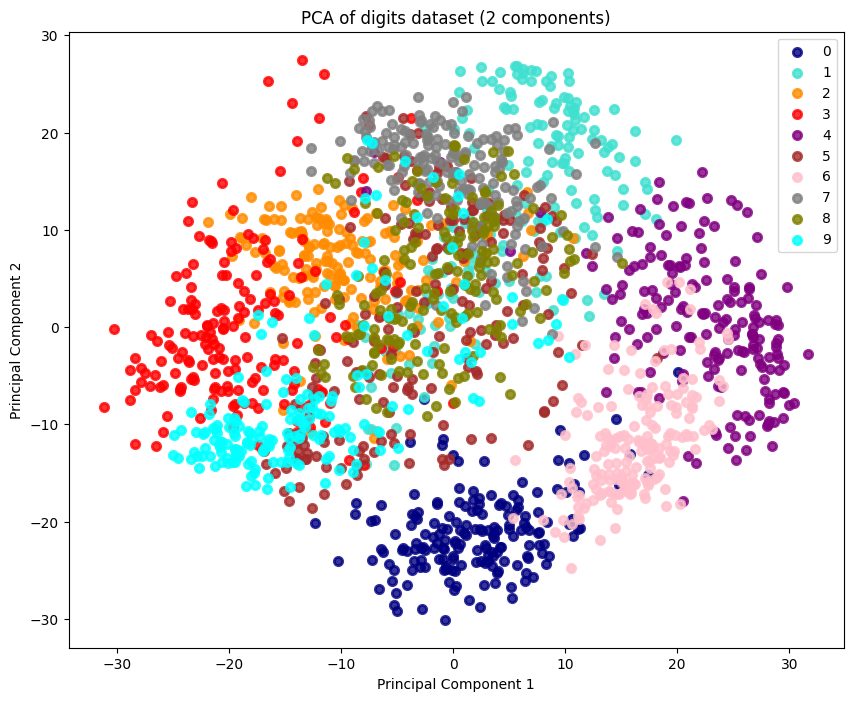

Percentage of variance captured by the first two components: 0.2851%


In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA, keeping only the first two components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(DigitData.data)

# Create a DataFrame with the principal components and the target labels
import pandas as pd
pca_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])
pca_df['target'] = DigitData.target

# Plot the principal components
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], DigitData.target_names):
    plt.scatter(pca_df[pca_df['target'] == i]['principal_component_1'],
                pca_df[pca_df['target'] == i]['principal_component_2'],
                color=color,
                alpha=.8,
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of digits dataset (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Calculate the percentage of variance captured by the first two components
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_captured = explained_variance_ratio.sum()

print(f"Percentage of variance captured by the first two components: {total_variance_captured:.4f}%")

**PCA Observations and Analysis:**

Based on the PCA analysis with two components:

*   **Separation in the plot:** The scatter plot shows some separation between the different digits in the 2-dimensional space, but there is also significant overlap among several digits. This suggests that reducing the data to just two components loses a considerable amount of the original structure.
*   **Percentage of variance captured:** The percentage of variance captured by the first two principal components is approximately 28.51%. This is a relatively low percentage, indicating that only a small portion of the total variability in the original 64-dimensional data is retained by these two components.
*   **Sufficiency of components:** Given the significant overlap in the plot and the low percentage of variance captured, two components are likely not sufficient to adequately represent the dataset for tasks like classification or further detailed analysis. To retain more information and potentially achieve better separation, we should more principal components.

#2. K-mean Clustering
In this excercise we still use the same digit data set as above from sklearn.
We should to scale this data before performing clustering using `scale` from `sklearn.preprocessing`  


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(DigitData.data)

Let's see the images with their labels using `matplotlib`.

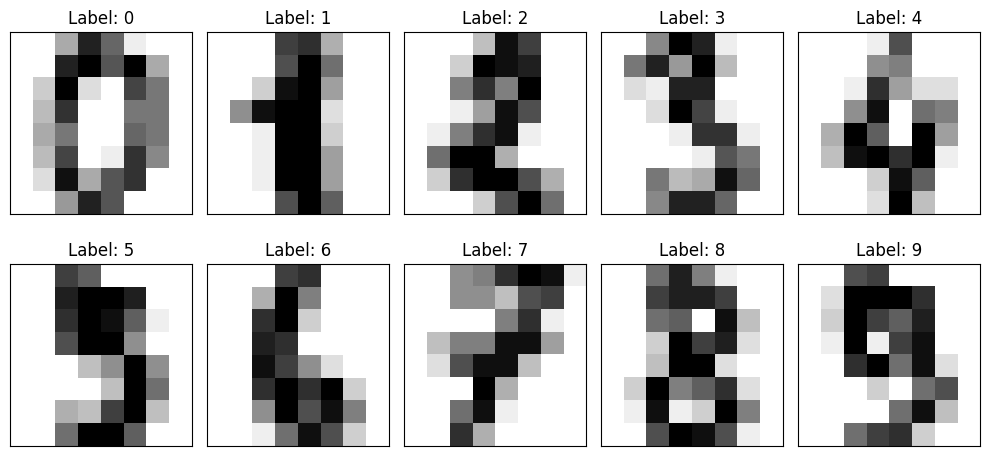

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(DigitData.images[i], cmap='binary', interpolation='nearest')
    ax.set_title(f'Label: {DigitData.target[i]}')

plt.tight_layout()
plt.show()

Divide the data into training set and test set with testset = 20% of total data using `train_test_split` from `sklearn.cross_validation`

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, DigitData.target, test_size=0.2, random_state=42)

Perform clustering assuming there are 10 clusters using `cluster` from `sklearn`. Use KMeans function of cluster (cluster.KMeans).

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(X_train)

KMeans(n_clusters=10, n_init=10, random_state=42)

Assign numbering or labels to your clusters and pretending we do not know the actual labels as this labeling has nothing to do with actual labels.

In [7]:
import numpy as np
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

# Assign labels to clusters based on the most frequent true label in each cluster
labels = np.zeros_like(kmeans.labels_)
for i in range(10):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(y_train[mask])[0]

mat = confusion_matrix(y_train, labels)
print("Confusion Matrix (Training Data):")
print(mat)

Confusion Matrix (Training Data):
[[144   1   0   0   0   0   0   0   0   0]
 [  0 124  22   6   0   0   0   2   0   0]
 [  1  11 121   9   0   0   0   2   0   0]
 [  0   2   0 129   0   9   0   9   0   0]
 [  0   4   0   0 117   1   0  13   0   0]
 [  0   1   0  30   2  99   2   1   0   0]
 [  0   7   0   0   0   0 139   0   0   0]
 [  0   1   0   0   1   4   0 139   0   0]
 [  0  71   4  49   0  14   1   5   0   0]
 [  0   3   0 112   0   2   0  23   0   0]]



Test the cluster on the test data set.

In [8]:
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
import numpy as np

test_clusters = kmeans.predict(X_test)

# Assign labels to the test clusters based on the same mapping derived from the training data
test_labels = np.zeros_like(test_clusters)
for i in range(10):
    mask = (test_clusters == i)
    train_mask = (kmeans.labels_ == i)
    if np.sum(train_mask) > 0: # Ensure there are training points in this cluster
        mode_label = mode(y_train[train_mask])[0]
        test_labels[mask] = mode_label
    else:
        # Handle cases where a cluster might not have any training data points
         test_labels[mask] = mode(y_train)[0] # Assign the overall most frequent label to that cluster

mat_test = confusion_matrix(y_test, test_labels)
print("Confusion Matrix (Test Data):")
print(mat_test)

Confusion Matrix (Test Data):
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 21  5  2  0  0  0  0  0  0]
 [ 0  3 28  2  0  0  0  0  0  0]
 [ 0  1  1 29  0  1  0  2  0  0]
 [ 0  0  0  0 44  0  0  2  0  0]
 [ 0  0  0 14  0 31  1  1  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0 17  0  7  0  5  0  1  0  0]
 [ 0  0  0 33  0  1  0  6  0  0]]


Similar to the training confusion matrix, this matrix shows how the clustering performed on unseen data. We can observe the numbers along the diagonal to see how many instances of each true digit were correctly assigned to the corresponding cluster. The off-diagonal numbers indicate misclassifications.

For example, look at the first row (True Label 0). The high number in the first column indicates that most of the actual '0' digits in the test set were assigned to the cluster that we labeled as '0' based on the training data.

However, you can also see numbers in off-diagonal cells. For instance, in the ninth row (True Label 8), there are significant numbers in columns corresponding to clusters labeled '1', '7', and '5'. This means that some of the actual '8' digits were incorrectly grouped into clusters that predominantly contained '1's, '7's, or '5's based on the training data.